In [74]:
import numpy as np
import matplotlib.pyplot as plt
import time 

0.10060660399904009


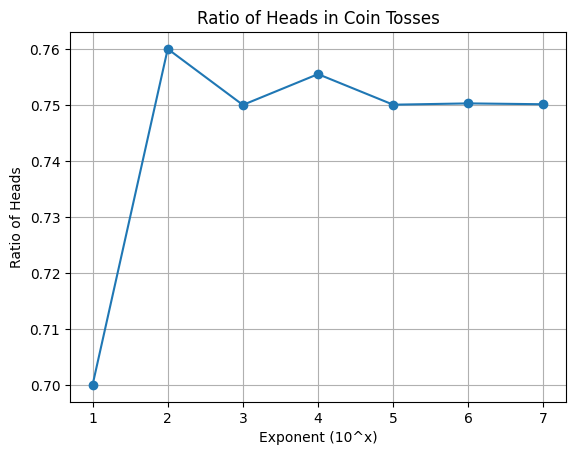

In [75]:
tic = time.perf_counter()
head_counts = []
for i in range (1, 8):
    toss_nb = 10**i
    coin_tosses = np.random.random(toss_nb) < 0.75 # 3 / 1 heads ratio
    head_count = np.sum(coin_tosses)
    head_counts.append(head_count/toss_nb)
toc = time.perf_counter()
print(toc-tic)
 
toss_nbs = range(1, 8)
plt.plot(toss_nbs, head_counts, marker='o')
plt.xlabel('Exponent (10^x)')
plt.ylabel('Ratio of Heads')
plt.title('Ratio of Heads in Coin Tosses')
plt.grid(True)
plt.show()

0.16102139000031457


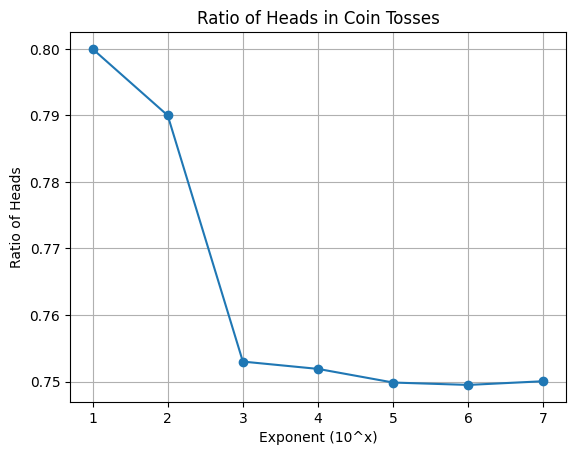

11111110


In [77]:
tic = time.perf_counter()
toss_pws = np.arange(1,8)
toss_nbs = 10 ** toss_pws
total_tosses = np.sum(toss_nbs)
coin_tosses = np.random.random(total_tosses) < 0.75
split_idx = np.cumsum(toss_nbs[:-1])
head_counts = np.add.reduceat(coin_tosses, np.r_[0, split_idx])
head_proportion = head_counts / toss_nbs
toc = time.perf_counter()
print(toc-tic)
plt.plot(toss_pws, head_proportion, marker='o')
plt.xlabel('Exponent (10^x)')
plt.ylabel('Ratio of Heads')
plt.title('Ratio of Heads in Coin Tosses')
plt.grid(True)
plt.show()

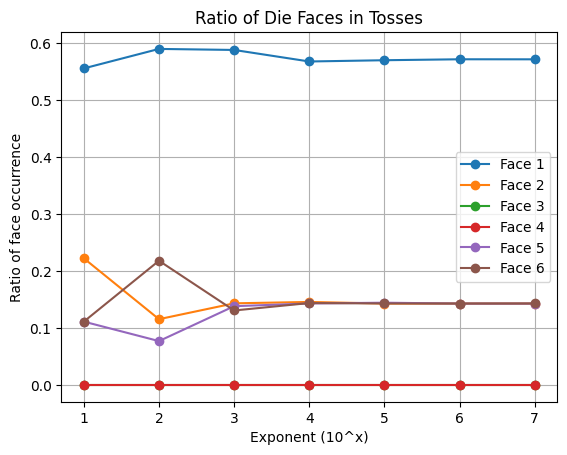

In [35]:
face_prob = 1/6
counts = {die_face: [] for die_face in range(1, 7)}

for i in range (1, 8):
    toss_nb = 10**i
    tosses = np.random.random(toss_nb)
    redundant = 0
    for it in range (toss_nb):
        if it%3 == 0:
            tosses[it] = 0.1
        if (tosses[it] > face_prob*2) & (tosses[it] < face_prob*4):
            tosses[it]=-1
            redundant += 1
    toss_nb -=redundant
    for die_face in range (1, 7):
        count = np.sum(((die_face-1) * face_prob < tosses) & (tosses< die_face * face_prob )) 
        counts[die_face].append(count/toss_nb)


toss_nbs = range(1, 8)

for die_face in range(1, 7):
    plt.plot(toss_nbs, counts[die_face], marker='o', label=f'Face {die_face}')

plt.xlabel('Exponent (10^x)')
plt.ylabel('Ratio of face occurrence')
plt.title('Ratio of Die Faces in Tosses')
plt.grid(True)
plt.legend() 
plt.show()

In [56]:
dice = [
    [2,2,2,5,5,5],
    [3,3,3,3,3,6],
    [1,4,4,4,4,4]
]
face_prob = 1/6

avg_val = {}

for die_color in range (3):
    trials = np.random.random(10**7)
    avg_val[die_color] = 0
    for val in trials:
        idx = int(val/face_prob)
        avg_val[die_color] += dice[die_color][idx]
    avg_val[die_color] /= 10**7
print(avg_val)


{0: 3.5004056, 1: 3.5003133, 2: 3.4995598}
